# KNN(K-Nearest Neighbors)
----------------------------------------------------------------------------------------------------------------
In this section we will be taking a look at another classification algorithm known as KNN or K-Nearest Neighbors. It is a supervised Machine Learning algorithm that can be used for both regression and classification-type problems but it is primarily used for classification purposes. It uses ‘feature-similarity’ to predict the label class of new datapoints. It checks for a certain number of points in its vicinity and compares it with our test data in order to predict what class our test datapoint belongs to.

## Importing Project Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset
---
For this notebook we will be using the **Iris Dataset**. It is one of the most common starter datasets for classification task in Machine Learning. It has total 5 of columns which contain information regarding the length and width of the sepals and petals (in cm) and a target class (the species of the flower) that we will be predicting at the end.

In [2]:
from sklearn.datasets import load_iris # loading our dataset from sklearn library

In [3]:
iris = load_iris()

When we load our data using Sklearn, it comes in the form of a numpy array so let's convert it into Pandas DataFrame using *'pd.DataFrame()'* so that its easier for us to analyse our data. We give as an input to the *pd.DataFrame()* a numpy array and a list of names of the columns. We then use *'np.c_'* to concatenate the features and the target into one numpy array to put it all into one dataframe.

In [4]:
# converting our dataset into a pandas dataframe for better understanding. We are concatenating the features and the target in a numpy array 
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 

In [5]:
df.head() # checking the top 5 rows of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Data Pre-Processing
----------------------------------------------------------------------------------------------------------------



We will start by checking some basic information regarding our dataset such as the data-type of the column values, the entries in the columns and so on. We will also make sure that we dont have any null values in our data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [7]:
df.isnull().sum() #checking for null values in our data

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

We checked for null values and found that there are no null values so we can continue. Now we only wish to work with two featues that are - 
* petal length (cm) and 
* petal width (cm) 

So we will go ahead and use *'df.drop()'* method to drop the sepal width and sepal length columns.

In [8]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis = 1,inplace = True) # we will only work with the petal dimesnions in this notebook

Let's take a look at our new dataframe.

In [9]:
df.head() # checking the new data frame

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


So  we only have two features now i.e. the petals width and length. Lets go ahead and scale down our features in order to make the data more uniform before we proceed to train our model. Scaling your data is a necessary step as it ensures that while training, each feature has an unbiased representation in making the final predictions. Unscaled values can result in data imbalance. You will learn more about data imbalance and different ways to deal with it later.

In [10]:
from sklearn.preprocessing import StandardScaler # importing the StandardScaler class to perform standardization on data
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df.drop('target',axis = 1)) #performing transformations

In [11]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) # our new dataset with scaled values
df_feat.head()

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


Now that we have our new data, let's go ahead and define our X and y variables. The X contains all our features that we will use to train the model and y contains the target variables. We will use these variables when we split our data into training and testing set.

In [12]:
X = df_feat # featues
y = df['target'] # target

In [13]:
# splitting our data into training and testing set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
X_train.shape[0], X_test.shape[0]

(127, 23)

# Modeling 
---
This the part where we create and train our model.

In [14]:
#step 1 - Importing the KNeighborsClassifier and accuracy metrics methods from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#Step 2 - Creating the model object and setting a temporary nearest neighbors value
knn = KNeighborsClassifier(n_neighbors = 20)

#Step 3 - Fitting the model with our data
knn.fit(X_train,y_train)

#Step 4 - Making predictions
pred = knn.predict(X_test)

In [16]:
#Step 5 - Checking how our model performed
print(classification_report(y_test,pred), end="\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.80      0.89         5

    accuracy                           0.96        23
   macro avg       0.97      0.93      0.95        23
weighted avg       0.96      0.96      0.96        23

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1  4]]


Now even though we got a very good accuracy of 96%, we can always try and further improve the accuracy of our model. In order to make this more accurate we will try to find the best *'n_neighbors'* value for our model. Lets take a look at how we can do that.

In [17]:
error = []
for i in  range(1,100):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

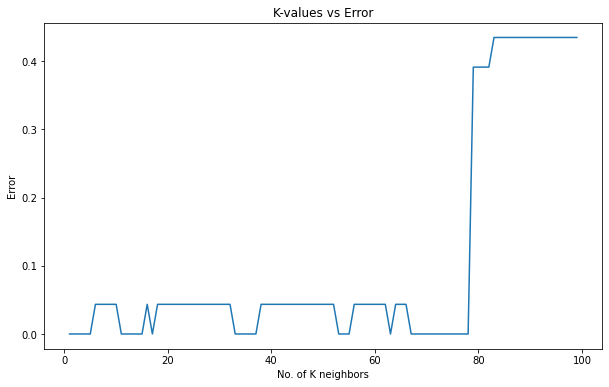

In [18]:
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error)
plt.title('K-values vs Error')
plt.xlabel('No. of K neighbors')
plt.ylabel('Error')
plt.show()

As we can see, we plotted the K value against the error. We compared both of these and tried to find a the best K value, i.e., the value of K for which error is the least. In our case we have two places where we can get almost perfect accuracy  from our model so let's set 12 as the value of n_neighbors hyperparameter.

In [19]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred1 = knn.predict(X_test)

In [20]:
print(classification_report(y_test,pred1))
print('\n')
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



[[ 7  0  0]
 [ 0 11  0]
 [ 0  0  5]]


And as you can see we have a model with 100% accuracy! So finding the best n_neighbors value plays a very important role in determining the accuracy of our model. And with this we come to an end to this notebook. We recommend you to go through this notebook again before you move on to the quiz questions.